# <center>MVTS Data Toolkit</center>
## <center>A Toolkit for Pre-processing Multivariate Time Series Data</center>

<img src="https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/MVTS_Data_Toolkit_icon2.png">

* **Title:** MVTS Data Toolkit: A Toolkit for Pre-processing Multivariate Time Series Data
* **Journal:** SoftwareX Journal [$\triangleright$](https://www.journals.elsevier.com/softwarex)(Elsevier)
* **Authors:** Azim Ahmadzadeh [$\oplus$](https://www.azim-a.com/), Kankana Sinha [$\ominus$](https://www.linkedin.com/in/kankana-sinha-4b4b13131/), Berkay Aydin [$\otimes$](https://grid.cs.gsu.edu/~baydin2/), Rafal A. Angryk [$\oslash$](https://grid.cs.gsu.edu/~rangryk/)
* **Demo Author:** Azim Ahmadzadeh
* **Last Modified:** May 02, 2020

## Intro

This demo gives a quick tour over the toolkit's funcionalities. Here I will:
 1. download a multi-class dataset of 2000 multivariate time series (mvts) instances,
 2. show how the configuration file can be prepared,
 3. get some basic statistics about the data,
 4. extract multiple statistical features from the mvts instances, and visualize the results,
 5. analyze the extracted-feature data,
 6. normalize the extracted features,
 7. sample the extracted data to obtain a different ratios of the five classes.

In [1]:
import os
import yaml
import urllib.request
from mvtsdatatoolkit.data.data_retriever import DataRetriever  # for downloading data
import CONSTANTS as CONST
%matplotlib inline

## 1. Download the Dataset
In this demo I use an example dataset. In the following cells, it will be automatically downloaded. But in case something goes wrong, here is the direct link:
https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip
. Please note that here I am using the class `DataRetriever` that I implemented. This is only implemented for the purpose of this demo and is not one of the generic tools to be used for any other datasets.

Before we download it, let's take a quick look:

In [2]:
dr = DataRetriever(1)
dr.print_info()

URL:		https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip
NAME:		petdataset_01.zip
TYPE:		application/zip
SIZE:		32M


Ready to download? This may take a few seconds, depending on your internet bandwidth. Wait for the progress bar.

In [3]:
where_to = './temp/'  # Don't change this path.
dr.retrieve(target_path = where_to)

Extracting: 100%|██████████| 2001/2001 [00:01<00:00, 1869.24it/s]


OK. Let's see how many files are available to us now.

In [4]:
dr.get_total_number_of_files()

2000

## 2. Setup Configurations
For tasks such as feature extraction (module: `features.feature_extractor`) and data analysis (modules: `data_analysis.mvts_data_analysis` and `data_analysis.extracted_features_analysis`) a configuration file must be provided by the user.

This configuration file is a `yml` file, specificly defined for the dataset of interest and can be stored anywhere the user wish.

Here, we download and use our own configuration file as an example.

In [5]:
conf_url = 'https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/demo_configs.yml'
path_to_config = './demo_configs.yml'
urllib.request.urlretrieve(conf_url, path_to_config)

('./demo_configs.yml', <http.client.HTTPMessage at 0x7f310c3d73c8>)

Let's take a look at the content of the config file which is located at `./demo_configs.yml`:

In [6]:
with open(path_to_config, 'r') as f:
    print(f.read())

PATH_TO_MVTS: './temp/petdataset_01/'
PATH_TO_EXTRACTED_FEATURES: './temp/extracted_features/'
META_DATA_TAGS: ['id', 'lab', 'st', 'et']
MVTS_PARAMETERS:
  - 'TOTUSJH'
  - 'TOTBSQ'
  - 'TOTPOT'
  - 'TOTUSJZ'
  - 'ABSNJZH'
  - 'SAVNCPP'
  - 'USFLUX'
  - 'TOTFZ'
  - 'MEANPOT'
  - 'EPSZ'
  - 'MEANSHR'
  - 'SHRGT45'
  - 'MEANGAM'
  - 'MEANGBT'
  - 'MEANGBZ'
  - 'MEANGBH'
  - 'MEANJZH'
  - 'TOTFY'
  - 'MEANJZD'
  - 'MEANALP'
  - 'TOTFX'
  - 'EPSY'
  - 'EPSX'
  - 'R_VALUE'
STATISTICAL_FEATURES:
  - 'get_min'
  - 'get_max'
  - 'get_median'
  - 'get_mean'
  - 'get_stddev'
  - 'get_var'
  - 'get_skewness'
  - 'get_kurtosis'
  - 'get_no_local_maxima'
  - 'get_no_local_minima'
  - 'get_no_local_extrema'
  - 'get_no_zero_crossings'
  - 'get_mean_local_maxima_value'
  - 'get_mean_local_minima_value'
  - 'get_no_mean_local_maxima_upsurges'
  - 'get_no_mean_local_minima_downslides'
  - 'get_difference_of_mins'
  - 'get_difference_of_maxs'
  - 'get_difference_of_means'
  - 'get_difference_of_stds'
  -

Here is the break-down of the pieces:
 - `PATH_to_MVTS`: A relative or absolute path to where the multivariate time series dataset is stored at.
 - `PATH_TO_EXTRACTED`: A relative or absolute path to where the extracted features should be stored at, using the Feature Extraction component of the package.
 - `META_DATA_TAGS`: A list of tags based on which some pieces of information can be extracted from the file-names of the multivariate time series. For example, if timestamps are encoded in the file-names, e.g., `_st[YYYY-MM-DD HH:MM:SS]`, then the string `st` (without brackets) is a tag that can be included in this list. In the feature extraction process, this will add the corresponding metadata (i.e., what is wrapped in the square brackets) in each filename, as an extra column to the data-frame of the extracted features. Generally, using this functionality, any extra metadata (e.g., class labels, start-time, end-time, id's, etc) can be encoded in the file-names and consequently passed into the extracted features.
 - `MVTS_PARAMETERS`: A list of parameter-names that are used in the multivariate time series dataset, whose statistical features are of interest. These are, in other words, the column-names in the multivariate time series files.
 - `STATISTICAL_FEATURES`: A list of statistical features of interest to be extracted from the multivariate time series. They must be chosen from the provided methods in the module `features.feature_collection.`. For example, `get_min` is a valid feature-name as this method is implemented in the package.
 
 In the following steps, you will see how this can be used.

## 3. Analysis of Raw Data (MVTS Data Analysis)

- #### How many files? How large of a dataset?

Using `mvts_data_analysis` module users can get an idea of the dataset they are going to work on. I start with creating an instance of the `MVTSDataAnalysis` class. This right away gives me some high-level information about the dataset.

In [7]:
from mvtsdatatoolkit.data_analysis.mvts_data_analysis import MVTSDataAnalysis

mvda = MVTSDataAnalysis(path_to_config)
mvda.print_stat_of_directory()

----------------------------------------
Directory:			./temp/petdataset_01/
Total no. of files:	2000
Total size:			76M
Total average:		38K
----------------------------------------


- #### Get a summary stats of the data.

Let's now get some statistics from the content of the files. To speed up the demo, I analyze only 3 time series parameters (namely `TOTUSJH`, `TOTBSQ`, and `TOTPOT`), and only the first 50 mvts files.

In [8]:
params = ['TOTUSJH', 'TOTBSQ', 'TOTPOT']
n = 50
mvda.compute_summary(params_name=params, first_k=n)
mvda.summary

Parameter-Name Val-Count Null-Count          mean           min  \
0        TOTUSJH      2992          8  4.375391e+02  3.494185e+00   
1         TOTBSQ      2992          8  5.476711e+09  1.983268e+07   
2         TOTPOT      2992          8  8.365366e+22  1.205181e+20   

           25th          50th          75th           max  
0  3.394970e+01  8.007204e+01  3.657864e+02  3.162777e+03  
1  2.559297e+08  6.883422e+08  7.442871e+09  3.848284e+10  
2  1.854107e+21  4.827195e+21  3.862271e+22  7.108347e+23

... which says the length of the time series, across the 50 mvts files is 3000, including 0 `NA/NAN` values. In addition, `mean`, `min`, `max`, and three quantiles are calculated for each time series.

 - #### You have a LARGE dataset?
 A parallel version of this function is also provided to help process much larger datasets efficiently. Below, we will have 4 processes to compute the summary statistics.

In [9]:
mvda.compute_summary_in_parallel(n_jobs=4, first_k=50, verbose=False,
                                     params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'])
mvda.summary

Parameter-Name Val-Count Null-Count          mean           min  \
0        TOTUSJH      2992          8  4.315823e+02  3.494185e+00   
1         TOTBSQ      2992          8  5.409527e+09  1.983268e+07   
2         TOTPOT      2992          8  8.257443e+22  1.205181e+20   

           25th          50th          75th           max  
0  3.386945e+01  8.011579e+01  3.661924e+02  3.162777e+03  
1  2.541928e+08  6.883836e+08  7.440199e+09  3.848284e+10  
2  1.855654e+21  4.823817e+21  3.840961e+22  7.108347e+23

**Note**: The results of the parallel and sequential versions of `mvts_data_analysis` are not exactly identical. This discrepency is due to the fact that in the parallel version, the program has to approximate the percentiles. More specifically, it is designed to avoid loading the entire dataset into memory so that it is not confined to any particular data size. Therefore, it relies on some statistical estimators to approximate the percentiles with some acceptable error. The errors decrease significantly as the number of mvts files increases. In conclusion, for small datasets I recommend using the sequential version.

## 4. Feature Extraction

- #### What statistical features are available?

Now that we have an idea about our raw data, let's extract some features from the data. A list of 48 statistical features are implemented in `feature_collection`. Let's take a look at them.

In [10]:
import mvtsdatatoolkit.features.feature_collection as fc
help(fc)

Help on module mvtsdatatoolkit.features.feature_collection in mvtsdatatoolkit.features:

NAME
    mvtsdatatoolkit.features.feature_collection

FUNCTIONS
    get_average_absolute_change(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average absolute first difference of a univariate time series.
    
    get_average_absolute_derivative_change(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average absolute first difference of a derivative of univariate time series.
    
    get_avg_mono_decrease_slope(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average slope of monotonically decreasing segments.
    
    get_avg_mono_increase_slope(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average slope of monotonically increasing segments.
    
    get_dderivative_kurtosis(uni_ts:Union[pandas.core.series.Series,

- #### How to extract these features from the data?

Let's extract 3 simple statistical features, namely `min`, `max`, and `median`, from 3 parameters, such as `TOTUSJH`, `TOTBSQ`, and `TOTPOT`. Again, to speed up the process in this demo, we only process the first 50 mvts files.

In [11]:
from mvtsdatatoolkit.features.feature_extractor import FeatureExtractor

fe = FeatureExtractor(path_to_config)
fe.do_extraction(features_name=['get_min', 'get_max', 'get_median'],
                 params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'], first_k=50)
fe.df_all_features

id lab                   st                   et  TOTUSJH_min  \
0   3497  NF  2013-12-17T10:24:00  2013-12-17T22:12:00  1360.686972   
1   3591  NF  2014-01-09T20:00:00  2014-01-10T07:48:00    67.583341   
2   3497   C  2013-12-19T16:24:00  2013-12-20T04:12:00  2387.389401   
3   3576  NF  2014-01-04T18:12:00  2014-01-05T06:00:00    24.722524   
4   3457  NF  2013-12-04T12:36:00  2013-12-05T00:24:00   772.739695   
5   3265  NF  2013-10-08T12:36:00  2013-10-09T00:24:00     9.809842   
6   3334  NF  2013-11-01T13:00:00  2013-11-02T00:48:00    53.759144   
7   3420  NF  2013-11-24T16:24:00  2013-11-25T04:12:00   546.477132   
8   3335  NF  2013-11-02T01:36:00  2013-11-02T13:24:00     6.218266   
9   3362  NF  2013-11-08T12:48:00  2013-11-09T00:36:00    46.615346   
10  3497  NF  2013-12-17T20:24:00  2013-12-18T08:12:00  1676.119436   
11  3293  NF  2013-10-22T19:48:00  2013-10-23T07:36:00   239.229759   
12  3448  NF  2013-12-01T06:24:00  2013-12-01T18:12:00   575.472718   
13  3366   C  2013-11-16T20:12:00  2013-11-17T08:00:00  2848.177100   
14  3371  NF  2013-11-10T13:12:00  2013-11-11T01:00:00    45.024335   
15  3309  NF  2013-10-29T12:36:00  2013-10-30T00:24:00    27.930504   
16  3347  NF  2013-11-07T14:36:00  2013-11-08T02:24:00    79.526392   
17  3647   C  2014-01-24T03:00:00  2014-01-24T14:48:00  2315.954890   
18  3578  NF  2014-01-10T20:36:00  2014-01-11T08:24:00    29.505180   
19  3480  NF  2013-12-09T07:36:00  2013-12-09T19:24:00    80.476237   
20  3529  NF  2013-12-24T03:48:00  2013-12-24T15:36:00    23.049501   
21  3400  NF  2013-11-26T02:12:00  2013-11-26T14:00:00   348.344100   
22  3419  NF  2013-11-23T02:36:00  2013-11-23T14:24:00     9.960243   
23  3347  NF  2013-11-07T00:36:00  2013-11-07T12:24:00   112.561405   
24  3464  NF  2013-12-04T21:00:00  2013-12-05T08:48:00    22.138169   
25  3344  NF  2013-11-05T11:36:00  2013-11-05T23:24:00     9.118935   
26  3441  NF  2013-11-29T20:48:00  2013-11-30T08:36:00    62.106379   
27  3423  NF  2013-11-24T03:36:00  2013-11-24T15:24:00    12.442314   
28  3441  NF  2013-11-27T19:48:00  2013-11-28T07:36:00    74.039773   
29  3540  NF  2013-12-28T04:24:00  2013-12-28T16:12:00    31.691903   
30  3601  NF  2014-01-13T23:24:00  2014-01-14T11:12:00   599.674564   
31  3367  NF  2013-11-12T16:24:00  2013-11-13T04:12:00   136.075445   
32  3367  NF  2013-11-10T07:24:00  2013-11-10T19:12:00    70.232592   
33  3515   C  2013-12-17T23:24:00  2013-12-18T11:12:00    61.522212   
34  3557  NF  2014-01-03T00:36:00  2014-01-03T12:24:00     7.942284   
35  3595  NF  2014-01-14T13:24:00  2014-01-15T01:12:00    49.277672   
36  3405  NF  2013-11-21T00:12:00  2013-11-21T12:00:00     3.494185   
37  3336   C  2013-11-01T15:48:00  2013-11-02T03:36:00    20.425692   
38  3306  NF  2013-10-27T23:24:00  2013-10-28T11:12:00    56.221270   
39  3350  NF  2013-11-04T23:48:00  2013-11-05T11:36:00    92.547335   
40  3452  NF  2013-12-05T18:24:00  2013-12-06T06:12:00    23.332383   
41  3368  NF  2013-11-19T19:48:00  2013-11-20T07:36:00   344.104420   
42  3385  NF  2013-11-23T19:36:00  2013-11-24T07:24:00    89.877585   
43  3395  NF  2013-11-24T21:12:00  2013-11-25T09:00:00   223.407651   
44  3401  NF  2013-11-17T15:00:00  2013-11-18T02:48:00    25.014610   
45  3473   C  2013-12-13T14:24:00  2013-12-14T02:12:00  2487.363966   
46  3451  NF  2013-12-02T00:12:00  2013-12-02T12:00:00     4.533153   
47  3452  NF  2013-12-03T21:24:00  2013-12-04T09:12:00    40.763319   
48  3569  NF  2014-01-06T08:00:00  2014-01-06T19:48:00    96.200992   
49  3836   C  2014-03-17T13:24:00  2014-03-18T01:12:00  1233.429874   

    TOTUSJH_max  TOTUSJH_median    TOTBSQ_min    TOTBSQ_max  TOTBSQ_median  \
0   1796.834808     1560.478180  1.341585e+10  1.954839e+10   1.668933e+10   
1    122.519078       80.033856  3.945462e+08  6.391988e+08   5.106504e+08   
2   2796.874544     2688.736459  3.143176e+10  3.563284e+10   3.514312e+10   
3     35.882308       29.838575  1.946227e+08  2.570207e+08   2.362926e+

... where each row corresponds to one mvts file, and the first 4 columns represent the extracted information from the file-names using the tags specified in the configuration file (i.e., `id`, `lab`, `st`, and `et`). The remaining columns contains the extracted features. They are named by appending each statistical-feature name to the end of a parameter-name, e.g., `TOTUSJH_min`.

 - #### Need to visulaize it?
 There are multiple visualizations incorporated in this package that are called in the `FeatureExtractor` class. Here is how you can used them:

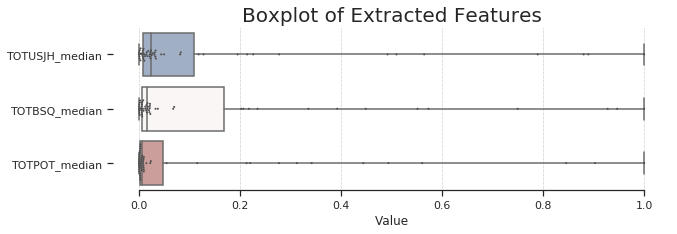

In [12]:
fe.plot_boxplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

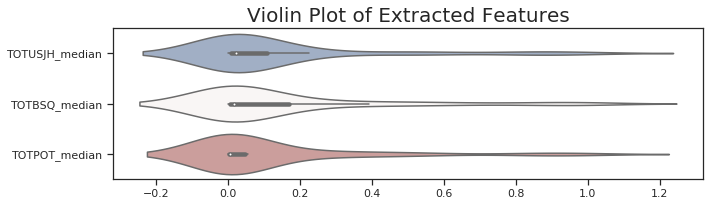

In [13]:
fe.plot_violinplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

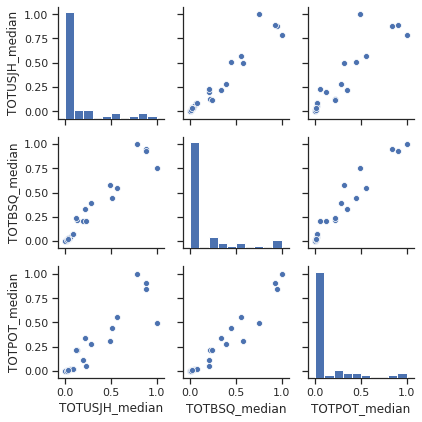

In [14]:
fe.plot_splom(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

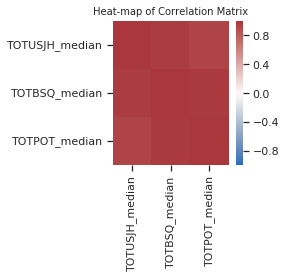

In [15]:
fe.plot_correlation_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

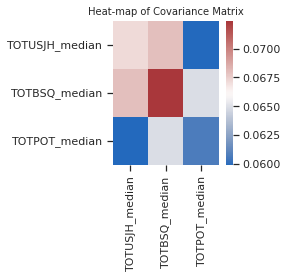

In [16]:
fe.plot_covariance_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

For all of these plots, it is a common practice to have the data normalized before generating such plots. This is automatically done in the above steps. Iin rare cases that normaliztion should not take place, using the `StatVisualizer` class in `stat_visualizer` module, this can be avoided. Simply, set the argument `normalize` in the class constructor to `False`.

Moreover, in any of the above visulization methods, by setting a path to the argument `output_path`, the generated plots can be stored as *png* files, instead of being shown through the GUI.

----

 - #### You have a LARGE dataset?
 No worries. Using the parallel implementation of the feature extraction process, this can be significantly sped up. Let's have 4 processes to extract the features.
 
 **Note** This time we work on all 2000 mvts files, not just the first 50! This is 40 times larger but it takes only 10 times longer (40 times / 4 jobs) than the sequential version.

In [17]:
fe.do_extraction_in_parallel(n_jobs=4,
                             features_name=['get_min', 'get_max', 'get_median'],
                             params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'])
fe.df_all_features[:5]

id lab                   st                   et  TOTUSJH_min  \
0  3286  NF  2013-10-25T01:24:00  2013-10-25T13:12:00   253.921733   
1  3370  NF  2013-11-16T22:00:00  2013-11-17T09:48:00    14.993722   
2  3341   X  2013-11-07T10:12:00  2013-11-07T22:00:00  3915.674951   
3  3483   C  2013-12-18T15:36:00  2013-12-19T03:24:00  1525.731932   
4  3513  NF  2013-12-24T12:24:00  2013-12-25T00:12:00   174.723657   

   TOTUSJH_max  TOTUSJH_median    TOTBSQ_min    TOTBSQ_max  TOTBSQ_median  \
0   300.769222      273.897202  4.254944e+09  4.808858e+09   4.641566e+09   
1    24.730249       19.247727  1.273321e+08  1.880978e+08   1.426225e+08   
2  4595.424287     4418.058749  5.185688e+10  5.653012e+10   5.474202e+10   
3  1725.450155     1633.682532  2.850978e+10  3.020128e+10   2.968356e+10   
4   227.592653      204.579052  1.288318e+09  1.640711e+09   1.476582e+09   

     TOTPOT_min    TOTPOT_max  TOTPOT_median  
0  3.439014e+22  4.536994e+22   4.094847e+22  
1  7.548713e+20  1.419217e+21   1.104080e+21  
2  1.038555e+24  1.140193e+24   1.123952e+24  
3  4.541544e+23  4.862053e+23   4.727651e+23  
4  9.286964e+21  1.296933e+22   1.174249e+22

**Note**: Here I am showing only the first 5 rows of the extracted features. Also, keep in mind that the column `id` should be used if we want to compare the results of this table with the one that was sequentially calculated.

## 5. Extracted Features Analysis

- #### A quick look over the results?

The extracted features can be easily summarized using descriptive statistics such as `meam`, `std`, `min`, `max`, and first, second and third quartiles. In addition, any missing value can also be spotted.

In [18]:
from mvtsdatatoolkit.data_analysis.extracted_features_analysis import ExtractedFeaturesAnalysis

efa = ExtractedFeaturesAnalysis(fe.df_all_features, exclude=['id'])
efa.compute_summary()
efa.summary

Feature-Name  Val-Count  Null-Count          mean           std  \
0     TOTUSJH_min     2000.0           0  8.012821e+02  1.427005e+03   
1     TOTUSJH_max     2000.0           0  9.534217e+02  1.610283e+03   
2  TOTUSJH_median     2000.0           0  8.678093e+02  1.501012e+03   
3      TOTBSQ_min     2000.0           0  1.156545e+10  2.196349e+10   
4      TOTBSQ_max     2000.0           0  1.297180e+10  2.372814e+10   
5   TOTBSQ_median     2000.0           0  1.226146e+10  2.286246e+10   
6      TOTPOT_min     2000.0           0  1.960882e+23  4.439333e+23   
7      TOTPOT_max     2000.0           0  2.894560e+23  2.289577e+24   
8   TOTPOT_median     2000.0           0  2.071366e+23  4.596827e+23   

            min          25th          50th          75th           max  
0  0.000000e+00  3.273820e+01  1.908205e+02  8.507221e+02  1.019574e+04  
1  3.994395e+00  5.781455e+01  2.742351e+02  1.065783e+03  1.152325e+04  
2  1.490241e+00  4.367289e+01  2.270971e+02  9.560433e+02  1.063433e+04  
3  0.000000e+00  2.644623e+08  1.859199e+09  1.160760e+10  1.354621e+11  
4  2.149169e+07  4.384896e+08  2.773385e+09  1.345348e+10  1.431918e+11  
5  8.785394e+06  3.580180e+08  2.249029e+09  1.253193e+10  1.413469e+11  
6  0.000000e+00  1.727556e+21  1.302453e+22  1.672474e+23  3.176636e+24  
7  1.085579e+20  3.153874e+21  2.161927e+22  1.954215e+23  8.101464e+25  
8  4.463689e+19  2.454831e+21  1.661687e+22  1.801092e+23  3.284844e+24

... which gives a summary statistics over every extracted feature. For instance, in row `0` that corresponds to the extracted feature `TOTUSJH_min`, the changes of the minimum values of the parameter `TUOTUSJH`, across 2000 mvts files, is described in terms of `mean`, `std`, `min`, `max`, and percentiles `25th` , `50th` (i.e., median), and `75th`. It also indicates that no `NA/NAN` or missing value was generated in the process.

## 6. Data Normalization

The extracted features can also be normalized using four different methods. Below, I use the zero-one normalization to transform values of each time-series (independently) to the `[0,1]` interval.

In [19]:
from mvtsdatatoolkit.normalizing import normalizer

df_norm = normalizer.zero_one_normalize(df=fe.df_all_features, excluded_colnames=['id'])
df_norm

id lab                   st                   et  TOTUSJH_min  \
0     3286  NF  2013-10-25T01:24:00  2013-10-25T13:12:00     0.024905   
1     3370  NF  2013-11-16T22:00:00  2013-11-17T09:48:00     0.001471   
2     3341   X  2013-11-07T10:12:00  2013-11-07T22:00:00     0.384050   
3     3483   C  2013-12-18T15:36:00  2013-12-19T03:24:00     0.149644   
4     3513  NF  2013-12-24T12:24:00  2013-12-25T00:12:00     0.017137   
5     3420  NF  2013-11-26T07:24:00  2013-11-26T19:12:00     0.036184   
6     3537  NF  2013-12-24T13:12:00  2013-12-25T01:00:00     0.004401   
7     3557   C  2013-12-30T14:36:00  2013-12-31T02:24:00     0.000868   
8     3497  NF  2013-12-16T04:24:00  2013-12-16T16:12:00     0.028106   
9     3341   C  2013-11-12T16:12:00  2013-11-13T04:00:00     0.241488   
10    3520  NF  2013-12-22T20:36:00  2013-12-23T08:24:00     0.233259   
11    3320  NF  2013-11-03T11:12:00  2013-11-03T23:00:00     0.004989   
12    3366   C  2013-11-11T23:12:00  2013-11-12T11:00:00     0.347089   
13    3273  NF  2013-10-20T07:00:00  2013-10-20T18:48:00     0.036329   
14    3272  NF  2013-10-11T15:36:00  2013-10-12T03:24:00     0.000732   
15    3432  NF  2013-11-29T09:36:00  2013-11-29T21:24:00     0.072100   
16    3483  NF  2013-12-20T13:36:00  2013-12-21T01:24:00     0.088785   
17    3580  NF  2014-01-11T13:00:00  2014-01-12T00:48:00     0.102581   
18    3400  NF  2013-11-19T12:12:00  2013-11-20T00:00:00     0.042925   
19    3448   C  2013-12-04T03:24:00  2013-12-04T15:12:00     0.051396   
20    3561  NF  2014-01-07T03:12:00  2014-01-07T15:00:00     0.001732   
21    3595  NF  2014-01-13T21:24:00  2014-01-14T09:12:00     0.006335   
22    3457   C  2013-12-11T13:36:00  2013-12-12T01:24:00     0.053676   
23    3490  NF  2013-12-13T21:24:00  2013-12-14T09:12:00     0.033219   
24    3407  NF  2013-11-21T08:36:00  2013-11-21T20:24:00     0.001383   
25    3449  NF  2013-12-08T06:24:00  2013-12-08T18:12:00     0.002942   
26    3542  NF  2013-12-31T23:12:00  2014-01-01T11:00:00     0.059423   
27    3688   M  2014-02-06T09:00:00  2014-02-06T20:48:00     0.416427   
28    3515  NF  2013-12-20T05:24:00  2013-12-20T17:12:00     0.046617   
29    3420  NF  2013-12-03T14:24:00  2013-12-04T02:12:00     0.003660   
...    ...  ..                  ...                  ...          ...   
1970  3364  NF  2013-11-11T07:24:00  2013-11-11T19:12:00     0.077535   
1971  3473  NF  2013-12-12T20:24:00  2013-12-13T08:12:00     0.209954   
1972  3343  NF  2013-11-04T20:36:00  2013-11-05T08:24:00     0.000346   
1973  3595  NF  2014-01-12T09:24:00  2014-01-12T21:12:00     0.004771   
1974  3316  NF  2013-10-26T04:48:00  2013-10-26T16:36:00     0.001021   
1975  3513  NF  2013-12-24T22:24:00  2013-12-25T10:12:00     0.019613   
1976  3520  NF  2013-12-23T14:36:00  2013-12-24T02:24:00     0.225768   
1977  3341   X  2013-11-04T21:12:00  2013-11-05T09:00:00     0.514996   
1978  3688   M  2014-02-03T05:00:00  2014-02-03T16:48:00     0.186897   
1979  3420  NF  2013-11-27T09:24:00  2013-11-27T21:12:00     0.022464   
1980  3465  NF  2013-12-07T09:12:00  2013-12-07T21:00:00     0.134552   
1981  3563   C  2014-01-09T04:00:00  2014-01-09T15:48:00     0.560471   
1982  3407  NF  2013-11-20T00:36:00  2013-11-20T12:24:00     0.003607   
1983  3481  NF  2013-12-09T13:12:00  2013-12-10T01:00:00     0.030924   
1984  3368  NF  2013-11-16T20:48:00  2013-11-17T08:36:00     0.035628   
1985  3376   C  2013-11-16T07:00:00  2013-11-16T18:48:00     0.295465   
1986  3396  NF  2013-11-25T13:24:00  2013-11-26T01:12:00     0.018339   
1987  3368  NF  2013-11-13T11:48:00  2013-11-13T23:36:00     0.064861   
1988  3473   C  2013-12-14T08:24:00  2013-12-14T20:12:00     0.249926   
1989  3608   C  2014-01-16T00:36:00  2014-01-16T12:24:00     0.041177   
1990  3344  NF  2013-11-10T09:36:00  2013-11-10T21:24:00     0.013059   
1991  3448  NF  2013-12-05T11:24:00  2013-12-05T23:12:00     0.056340   
1992  3309  NF  2013-10-25T23:36:00  2013-10-26T11:24:00     0.019

**Note**: The argument `excluded_colnames` is used to keep the column `id` unchanged in the normalization process. Although this column is numeric, normalization of its values would be meaningless. Moreover, any other column with non-numeric values were automatically preserved in the output.

## 7. Data Sampling

Very often our dataset suffers from the class-imbalance issue, especially when we are dealing with forecast/classification of natural phenomena. There are several generic methods in `sampling.sampler` module that allow a variety of different undersampling and oversampling techniques. Below, I will show some of them.

**Note**: Our dataset has 5 class labels, namely `X`, `M`, `C`, `B`, and `NF`.

First, I create a `Sampler` and check out the population of each class.

In [20]:
from mvtsdatatoolkit.sampling.sampler import Sampler

sampler = Sampler(extracted_features_df=fe.df_all_features, label_col_name='lab')
sampler.original_class_populations

{'NF': 1524, 'X': 16, 'C': 335, 'M': 115, 'B': 10}

- #### Sampling by size?

Suppose I want only 100 instances of `NF` class, nothing from `M`, all of the `X` and `C` instances, 20 of the `B` class.

In [21]:
desired_populations = {'X': -1, 'M': 0, 'C': -1, 'B': 20, 'NF': 100}
sampler.sample(desired_populations=desired_populations)
sampler.sampled_class_populations

{'NF': 100, 'X': 16, 'C': 335, 'M': 0, 'B': 20}

Which gives me exactly what I asked for. Note that I used *-1* to indicate that I want *all* instances of the `X` and `C` classes. Also, see how I received 20 instances of `B` class while there was originally only 10 insances of that class in the dataset. This allows a seamless *undersampling* and *oversampling*.

Let's make sure that the sampled dataframe has changed as I wanted.

In [22]:
print('Original shape: {}'.format(sampler.original_mvts.shape))
print('Sampled shape: {}'.format(sampler.sampled_mvts.shape))

Original shape: (2000, 13)
Sampled shape: (471, 13)


471 rows (= 100 + 335 + 0 + 20 + 16) is indeed what I wanted.

- #### Sampling by ratio?

The `Sampler` class allows sampling using the desired *ratio*s as well. This is particularly handy when a specific balance ratio is desired.

Suppose I need 50% of the entire population to come from `NF` class, nothing from `M` or `B` class, all of `X` class, and 20% from the `C` class.

In [23]:
desired_ratios = {'X': -1, 'M': 0.0, 'C': 0.20, 'B': 0.0,'NF': 0.50}
sampler.sample(desired_ratios=desired_ratios)
sampler.sampled_class_populations

{'NF': 1000, 'X': 16, 'C': 400, 'M': 0, 'B': 0}

Which is the exact ratios I asked for.

**Note**: I received 400 `C` instances while the dataset contains only 335 instances of `C` class.

**Note**: The desired ratios do not have to add up to 1. This allows users to do both *undersampling* and *oversampling* using ratios.

For more sampling methodologies implemented in `Sampler` class, see the documentation of the class.

----

## Final Note

In case
* you noticed any issue/bug in this demo or in the *MVTSData Toolkit* package, or
* there are other functionalities that you found it useful for your domain, but they are nor implemented here, or
* you have some ideas and you are willing to help us improve this package through a *pull request*,

please don't hesitate to contanct me (*aahmadzadeh1[at]cs[dot]gsu[dot].com*).

----

### Citation

Pleace cite this work if it comes handy in your research.

Currently, this package is under review in [SoftwareX journal](https://www.journals.elsevier.com/softwarex). If you are interested in using this, I can share the manuscrip with you. Till it is published, it can be cited as follows:

```
@article{ahmadzadeh2020mvts,
  title={MVTS-Data Toolkit: A Python Package for Preprocessing Multivariate Time Series Data}},
  author={Azim Ahmadzadeh, Kankana Sinha, Berkay Aydin, Rafal A. Angryk},
  journal={SoftwareX},
  volume={},
  pages={},
  year={under-review},
  publisher={Elsevier}
}
```